In [1]:
import sys
print(sys.executable)

/Users/paolopignatelli/anaconda3/envs/envVoronoi/bin/python


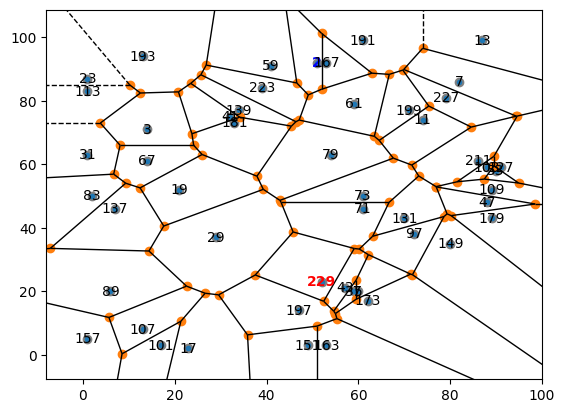

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from sympy import isprime

# Generate a two-dimensional list of 50 random integers.
np.random.seed(42)  # for reproducibility
var_rand = np.random.randint(0, 100, (50, 2))

# Create Voronoi tessellation using Fortune's algorithm. Sweep Algorithm
vor = Voronoi(var_rand)

# Generate ascending prime numbers to label cells.
def generate_primes(n):
    primes = []
    num = 2  # Starting from the first prime number
    while len(primes) < n:
        if isprime(num):
            primes.append(num)
        num += 1
    return primes

primes = generate_primes(len(var_rand))

# Plot Voronoi tessellation
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax)
ax.scatter(var_rand[:, 0], var_rand[:, 1], c='gray', marker='o')

# Smallest and largest prime numbers
smallest_prime = min(primes)
largest_prime = max(primes)

# Label Voronoi cells with ascending prime numbers and color/bold them
for i, (x, y) in enumerate(var_rand):
    prime = primes[i]
    text_params = {
        'ha': 'center',
        'va': 'center',
        'weight': 'normal',
        'color': 'black'
    }

    if prime == smallest_prime:
        text_params['weight'] = 'bold'
        text_params['color'] = 'blue'
    elif prime == largest_prime:
        text_params['weight'] = 'bold'
        text_params['color'] = 'red'

    ax.text(x, y, str(prime), **text_params)

# Show plot
plt.show()
